GLIMPSE2 can only impute biallelic sites, but works better than Beagle for low coverage seq data. The input data for GLIMPSE2 is BAM files and a panel/linkage map. BAM files are the only imputable data type for GLIMPSE2 so it won't work for VCFs from other sources such as microarrays. In short, GLIMPSE2 is best for seq data and Beagle would probably work well for both data types. Beagle also allows for the inclusion of effective population size information, which GLIMPSE2 does not.

In [1]:
%%bash
source ~/.bashrc
conda activate ipyrad
vcftools --gzvcf ../calls/apal_imputation_panel_hifi_illumina_filtered_whatshap.vcf.gz \
    --minGQ 20 --minQ 20 --recode-INFO-all --remove-indels \
    --max-missing 0.9 --thin 20000 --min-alleles 2 --max-alleles 2 \
    --min-meanDP 5 --max-meanDP 100 \
    --maf 0.05 --keep plink2.king.cutoff.in.id \
    --exclude-bed ../references/repeats.sorted.bed \
    --recode --out ../calls/pca_input

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details



VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf ../calls/apal_imputation_panel_hifi_illumina_filtered_whatshap.vcf.gz
	--keep plink2.king.cutoff.in.id
	--recode-INFO-all
	--maf 0.05
	--max-alleles 2
	--max-meanDP 100
	--min-alleles 2
	--minGQ 20
	--thin 20000
	--min-meanDP 5
	--minQ 20
	--max-missing 0.9
	--out ../calls/pca_input
	--recode
	--remove-indels
	--exclude-bed ../references/repeats.sorted.bed

Using zlib version: 1.2.11
Keeping individuals in 'keep' list
After filtering, kept 79 out of 103 Individuals
Outputting VCF file...
	Read 267644 BED file entries.
After filtering, kept 13450 out of a possible 2701277 Sites
Run Time = 298.00 seconds


In [256]:
%%bash
source ~/.bashrc
conda activate ipyrad
vcftools --gzvcf ../calls/apal_imputation_panel_hifi_illumina_filtered_whatshap.vcf.gz \
    --minGQ 20 --minQ 20 --recode-INFO-all \
    --max-missing 0.9 --thin 20000 --min-alleles 2 --max-alleles 2 \
    --min-meanDP 5 --max-meanDP 100 \
    --maf 0.05 --keep plink2.king.cutoff.in.id \
    --exclude-bed ../references/repeats.sorted.bed \
    --recode --out ../calls/pca_input

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details



VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf ../calls/apal_imputation_panel_hifi_illumina_filtered_whatshap.vcf.gz
	--keep plink2.king.cutoff.in.id
	--recode-INFO-all
	--maf 0.05
	--max-alleles 2
	--max-meanDP 100
	--min-alleles 2
	--minGQ 20
	--thin 20000
	--min-meanDP 5
	--minQ 20
	--max-missing 0.9
	--out ../calls/pca_input
	--recode
	--exclude-bed ../references/repeats.sorted.bed

Using zlib version: 1.2.11
Keeping individuals in 'keep' list
After filtering, kept 79 out of 103 Individuals
Outputting VCF file...
	Read 267644 BED file entries.
After filtering, kept 13504 out of a possible 2701277 Sites
Run Time = 333.00 seconds


In [257]:
%%bash
source ~/.bashrc
conda activate ipyrad
plink2 --vcf ../calls/pca_input.recode.vcf --allow-extra-chr --pca

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details
PLINK v2.00a2.3LM 64-bit Intel (24 Jan 2020)   www.cog-genomics.org/plink/2.0/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink2.log.
Options in effect:
  --allow-extra-chr
  --pca
  --vcf ../calls/pca_input.recode.vcf

Start time: Mon Oct  2 15:18:01 2023
515300 MiB RAM detected; reserving 257650 MiB for main workspace.
Using up to 48 threads (change this with --threads).
--vcf: 13504 variants scanned.
--vcf: plink2-temporary.pgen + plink2-temporary.pvar + plink2-temporary.psam
written.
79 samples (0 females, 0 males, 79 ambiguous; 79 founders) loaded from
plink2-temporary.psam.
13504 variants loaded from plink2-temporary.pvar.
Note: No phenotype data present.
Calculating allele frequencies... done.
Constructing GRM: 10111213141517181920212223

In [258]:
pca = pd.read_csv("./plink2.eigenvec", sep = "\t")
pca_eigen = pd.read_csv("./plink2.eigenval", sep = "\t")

In [259]:
metadata = pd.read_csv("../filtered_DARPA_metadata.csv")
platemap = pd.read_csv("../huck_sub_id.csv")
metadata = platemap.merge(metadata, how = "left", on = "Huck_Sub_ID")
metadata["Novogene_ID"] = "A" + metadata["Database ID"].astype(str)

In [260]:
hifi_meta = pd.read_csv("../hifi_metadata.csv")

In [261]:
metadata = metadata[["Novogene_ID", "Region", "Original Collection Site"]]

In [262]:
hifi_meta = hifi_meta[["Baums_db_id", "subregion"]]
hifi_meta.columns = ["Novogene_ID", "Region"]

In [263]:
metadata = pd.concat([metadata, hifi_meta]).reset_index(drop=True)

In [264]:
metadata.columns = ["#IID", "Region", "Reef"]

In [265]:
metadata["#IID"] = metadata["#IID"].astype(str)

In [266]:
pca = pca.merge(metadata, how = "left", on = "#IID")

In [267]:
pca["Sequence Data Type"] = np.nan
pca.loc[pca["#IID"].str.contains("A"), "Sequence Data Type"] = "Illumina"
pca.loc[~pca["#IID"].str.contains("A"), "Sequence Data Type"] = "HiFi"

In [269]:
pca_eigen

,3.3463
0,1.66950
1,1.38638
2,1.25226
3,1.24330
4,1.21595
5,1.18559
6,1.13614
7,1.12338
8,1.10854


Text(0, 0.5, 'PC2 (1.39%)')

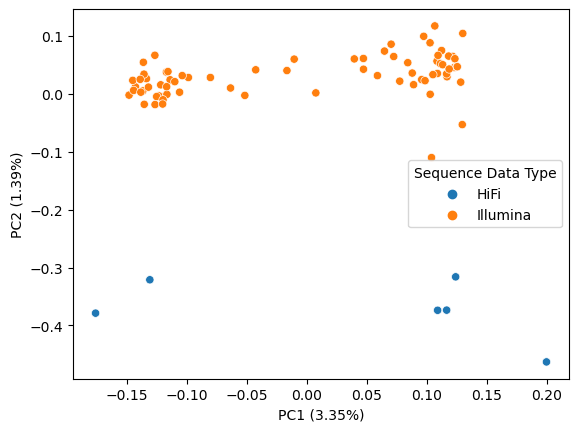

In [272]:
sns.scatterplot(pca, x = "PC1", y = "PC2", hue = "Sequence Data Type")
plt.xlabel("PC1 (3.35%)")
plt.ylabel("PC2 (1.39%)")

In [316]:
%%bash
source ~/.bashrc
conda activate ipyrad
vcftools --gzvcf ../calls/apal_imputation_panel_hifi_illumina_filtered_whatshap.vcf.gz \
    --minGQ 20 --minQ 20 --recode-INFO-all \
    --max-missing 0.9 --thin 20000 --min-alleles 2 --max-alleles 2 \
    --min-meanDP 5 --max-meanDP 100 \
    --maf 0.05 --keep plink2.king.cutoff.in.id \
    --remove-indv 20148 --remove-indv 20151 --remove-indv 20153 \
    --remove-indv 20154 --remove-indv 20155 --remove-indv 20156 \
    --exclude-bed ../references/repeats_and_cnv_sorted_merged.bed \
    --het --out ../calls/pca_input_nohifi

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details



VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf ../calls/apal_imputation_panel_hifi_illumina_filtered_whatshap.vcf.gz
	--keep plink2.king.cutoff.in.id
	--recode-INFO-all
	--maf 0.05
	--max-alleles 2
	--max-meanDP 100
	--min-alleles 2
	--minGQ 20
	--thin 20000
	--min-meanDP 5
	--minQ 20
	--max-missing 0.9
	--het
	--out ../calls/pca_input_nohifi
	--exclude-bed ../references/repeats_and_cnv_sorted_merged.bed
	--remove-indv 20148
	--remove-indv 20151
	--remove-indv 20153
	--remove-indv 20154
	--remove-indv 20155
	--remove-indv 20156

Using zlib version: 1.2.11
Keeping individuals in 'keep' list
Excluding individuals in 'exclude' list
After filtering, kept 73 out of 103 Individuals
Outputting Individual Heterozygosity
	Read 218633 BED file entries.
After filtering, kept 12992 out of a possible 2701277 Sites
Run Time = 285.00 seconds


In [317]:
pd.read_csv("../calls/pca_input_nohifi.het", sep = "\t")

,INDV,O(HOM),E(HOM),N_SITES,F
0,A13414,8451,8935.0,12880,-0.12270
1,A22001,8470,8967.8,12930,-0.12564
2,A22007,8575,8917.3,12854,-0.08696
3,A22036,8549,8886.4,12808,-0.08603
4,A22037,8517,8880.8,12799,-0.09283
...,...,...,...,...,...
68,A22237,8413,8834.7,12734,-0.10815
69,A22238,8528,8843.1,12743,-0.08081
70,A22240,8444,8882.9,12800,-0.11204
71,A22242,8154,8647.6,12426,-0.13065


In [233]:
%%bash
source ~/.bashrc
conda activate ipyrad
vcftools --gzvcf ../calls/apal_imputation_panel_hifi_illumina_filtered_whatshap.vcf.gz \
    --minGQ 20 --minQ 20 --recode-INFO-all \
    --max-missing 0.9 --thin 20000 --min-alleles 2 --max-alleles 2 \
    --min-meanDP 5 --max-meanDP 100 \
    --maf 0.05 --keep plink2.king.cutoff.in.id \
    --remove-indv 20148 --remove-indv 20151 --remove-indv 20153 \
    --remove-indv 20154 --remove-indv 20155 --remove-indv 20156 \
    --exclude-bed ../references/repeats_and_cnv_sorted_merged.bed \
    --recode --out ../calls/pca_input_nohifi

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details



VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf ../calls/apal_imputation_panel_hifi_illumina_filtered_whatshap.vcf.gz
	--keep plink2.king.cutoff.in.id
	--recode-INFO-all
	--maf 0.05
	--max-alleles 2
	--max-meanDP 100
	--min-alleles 2
	--minGQ 20
	--thin 20000
	--min-meanDP 5
	--minQ 20
	--max-missing 0.9
	--out ../calls/pca_input_nohifi
	--recode
	--exclude-bed ../references/repeats_and_cnv_sorted_merged.bed
	--remove-indv 20148
	--remove-indv 20151
	--remove-indv 20153
	--remove-indv 20154
	--remove-indv 20155
	--remove-indv 20156

Using zlib version: 1.2.11
Keeping individuals in 'keep' list
Excluding individuals in 'exclude' list
After filtering, kept 73 out of 103 Individuals
Outputting VCF file...
	Read 218633 BED file entries.
After filtering, kept 12992 out of a possible 2701277 Sites
Run Time = 296.00 seconds


In [234]:
%%bash
source ~/.bashrc
conda activate ipyrad
plink2 --vcf ../calls/pca_input_nohifi.recode.vcf --allow-extra-chr --pca --out nohifi

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details
PLINK v2.00a2.3LM 64-bit Intel (24 Jan 2020)   www.cog-genomics.org/plink/2.0/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to nohifi.log.
Options in effect:
  --allow-extra-chr
  --out nohifi
  --pca
  --vcf ../calls/pca_input_nohifi.recode.vcf

Start time: Mon Oct  2 15:04:36 2023
515300 MiB RAM detected; reserving 257650 MiB for main workspace.
Using up to 48 threads (change this with --threads).
--vcf: 12992 variants scanned.
--vcf: nohifi-temporary.pgen + nohifi-temporary.pvar + nohifi-temporary.psam
written.
73 samples (0 females, 0 males, 73 ambiguous; 73 founders) loaded from
nohifi-temporary.psam.
12992 variants loaded from nohifi-temporary.pvar.
Note: No phenotype data present.
Calculating allele frequencies... done.
Constructing GRM: 1112

In [463]:
pca = pd.read_csv("./nohifi.eigenvec", sep = "\t")
pca_eigen = pd.read_csv("./nohifi.eigenval", sep = "\t")

In [464]:
metadata = pd.read_csv("../filtered_DARPA_metadata.csv")
platemap = pd.read_csv("../huck_sub_id.csv")
metadata = platemap.merge(metadata, how = "left", on = "Huck_Sub_ID")
metadata["Novogene_ID"] = "A" + metadata["Database ID"].astype(str)

In [465]:
hifi_meta = pd.read_csv("../hifi_metadata.csv")

In [466]:
metadata = metadata[["Novogene_ID", "Region", "Original Collection Site"]]

In [467]:
hifi_meta = hifi_meta[["Baums_db_id", "subregion"]]
hifi_meta.columns = ["Novogene_ID", "Region"]

In [468]:
metadata = pd.concat([metadata, hifi_meta]).reset_index(drop=True)

In [469]:
metadata.columns = ["#IID", "Region", "Reef"]

In [470]:
metadata["#IID"] = metadata["#IID"].astype(str)

In [471]:
pca = pca.merge(metadata, how = "left", on = "#IID")

Text(0, 0.5, 'PC2 (1.24%)')

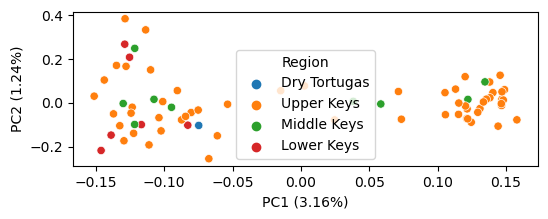

In [477]:
sns.scatterplot(pca, x = "PC1", y = "PC2", hue = "Region")
plt.xlabel("PC1 (3.16%)")
plt.ylabel("PC2 (1.24%)")

In [473]:
cluster1 = pca[pca["PC1"] > 0.1]
cluster2 = pca[pca["PC1"] < -0.05]

In [474]:
len(cluster1)

29

In [475]:
len(cluster2)

37

In [478]:
metadata = pd.read_csv("../filtered_DARPA_metadata(1).csv")
platemap = pd.read_csv("../huck_sub_id.csv")
metadata = platemap.merge(metadata, how = "left", on = "Huck_Sub_ID")
metadata["Novogene_ID"] = "A" + metadata["Database ID"].astype(str)

In [479]:
metadata.loc[metadata["Novogene_ID"].isin(cluster1["#IID"].tolist()), "cluster"] = 1
metadata.loc[metadata["Novogene_ID"].isin(cluster2["#IID"].tolist()), "cluster"] = 2

In [455]:
metadata = metadata[metadata["cluster"].notna()][metadata["RichED50"].notna()].reset_index(drop=True)

/tmp/ipykernel_1796111/3796061556.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  metadata = metadata[metadata["cluster"].notna()][metadata["RichED50"].notna()].reset_index(drop=True)


In [456]:
metadata = metadata[metadata["RichED50"].notna()].reset_index(drop=True)

In [446]:
metadata["RichED50"][metadata["cluster"] == 1].median()

36.73698872

In [457]:
metadata["RichED50"][metadata["cluster"] == 2].median()

36.64394571

In [397]:
from matplotlib import rcParams

/tmp/ipykernel_1796111/2879211361.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(metadata["RichED50"][metadata["cluster"] == 1], bins = 15)
/tmp/ipykernel_1796111/2879211361.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(metadata["RichED50"][metadata["cluster"] == 2], bins =

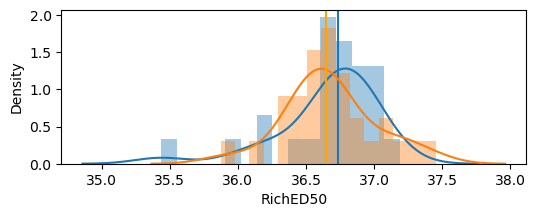

In [490]:
rcParams['figure.figsize'] = 6,2
ax = sns.distplot(metadata["RichED50"][metadata["cluster"] == 1], bins = 15)
ax.axvline(x = metadata["RichED50"][metadata["cluster"] == 1].median(),    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1) # Top of the plot
ax1 = sns.distplot(metadata["RichED50"][metadata["cluster"] == 2], bins = 15)
ax1.axvline(x = metadata["RichED50"][metadata["cluster"] == 2].median(),    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1, color = "orange") # Top of the plot

In [248]:
with open('../cluster1.txt', 'w') as f:
    for line in cluster1["#IID"].tolist():
        f.write(f"{line}\n")
with open('../cluster2.txt', 'w') as f:
    for line in cluster2["#IID"].tolist():
        f.write(f"{line}\n")

In [250]:
%%bash
source ~/.bashrc
conda activate ipyrad
vcftools --gzvcf ../calls/apal_imputation_panel_hifi_illumina_filtered_whatshap.vcf.gz \
    --minGQ 20 --minQ 20 --recode-INFO-all \
    --max-missing 0.9 --min-alleles 2 --max-alleles 2 \
    --min-meanDP 5 --max-meanDP 100 \
    --maf 0.05 \
    --remove-indv 20148 --remove-indv 20151 --remove-indv 20153 \
    --remove-indv 20154 --remove-indv 20155 --remove-indv 20156 \
    --exclude-bed ../references/repeats.sorted.bed \
    --weir-fst-pop ../cluster1.txt \
    --weir-fst-pop ../cluster2.txt \
    --fst-window-size 50000 \
    --fst-window-step 5000 \
    --out slidingwindowfst

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details



VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf ../calls/apal_imputation_panel_hifi_illumina_filtered_whatshap.vcf.gz
	--fst-window-size 50000
	--fst-window-step 5000
	--weir-fst-pop ../cluster1.txt
	--weir-fst-pop ../cluster2.txt
	--keep ../cluster1.txt
	--keep ../cluster2.txt
	--recode-INFO-all
	--maf 0.05
	--max-alleles 2
	--max-meanDP 100
	--min-alleles 2
	--minGQ 20
	--min-meanDP 5
	--minQ 20
	--max-missing 0.9
	--out slidingwindowfst
	--exclude-bed ../references/repeats.sorted.bed
	--remove-indv 20148
	--remove-indv 20151
	--remove-indv 20153
	--remove-indv 20154
	--remove-indv 20155
	--remove-indv 20156

Using zlib version: 1.2.11
Keeping individuals in 'keep' list
Excluding individuals in 'exclude' list
After filtering, kept 66 out of 103 Individuals
Outputting Windowed Weir and Cockerham Fst estimates.
	Read 267644 BED file entries.
Weir and Cockerham mean Fst estimate: 0.026203
Weir and Cockerham weighted Fst estimate: 0.02842

In [251]:
windowed = pd.read_csv("./slidingwindowfst.windowed.weir.fst", sep = "\t")

In [252]:
chroms = ["Apal_hic_scaffold_4", "Apal_hic_scaffold_10", "Apal_hic_scaffold_2", 
          "Apal_hic_scaffold_35", "Apal_hic_scaffold_17", "Apal_hic_scaffold_20", 
          "Apal_hic_scaffold_30", "Apal_hic_scaffold_1", "Apal_hic_scaffold_31", 
          "Apal_hic_scaffold_15", "Apal_hic_scaffold_6", "Apal_hic_scaffold_5", 
          "Apal_hic_scaffold_21", "Apal_hic_scaffold_11"]

In [253]:
windowed = windowed[windowed["CHROM"].isin(chroms)]

In [254]:
windowed = windowed.sort_values(["CHROM", "BIN_START"]).reset_index(drop=True)

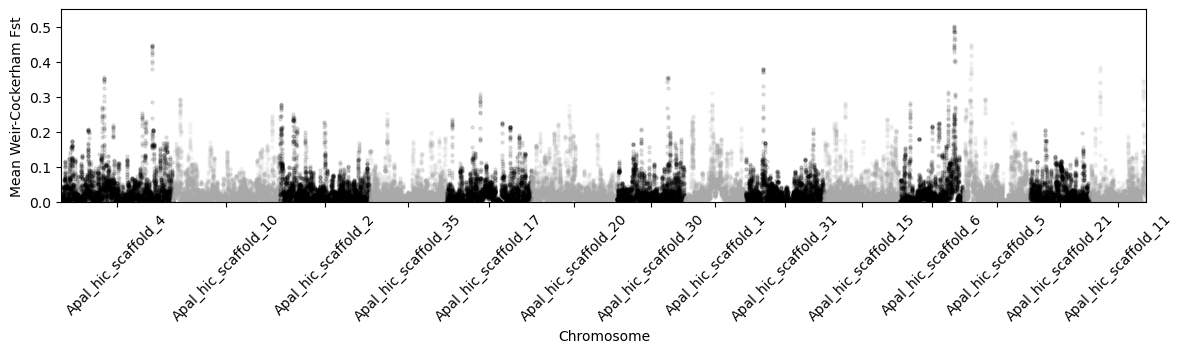

In [314]:
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
df = windowed
df.CHROM = df.CHROM.astype('category')
df.CHROM = df.CHROM.cat.set_categories(chroms, ordered=True)
df = df.sort_values(["CHROM", "BIN_START"])

# How to plot gene vs. -log10(pvalue) and colour it by chromosome?
df['ind'] = range(len(df))
df_grouped = df.groupby(('CHROM'))

# manhattan plot
fig = plt.figure(figsize=(14, 2.5)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['black', "darkgrey"]
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='ind', y='WEIGHTED_FST',color=colors[num % len(colors)], ax=ax, alpha = 0.1, s = 5)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(df)])
ax.set_ylim([0, 0.55])

# x axis label
ax.set_xlabel('Chromosome')
ax.set_ylabel("Mean Weir-Cockerham Fst")
plt.xticks(rotation=45)

# show the graph
plt.show()

In [1]:
import pandas as pd
import numpy as np
import subprocess
import seaborn as sns

In [22]:
evalsamples = pd.read_csv("../evalsamples_IDs.txt", header = None, names = ["Sample"])

In [23]:
cov = [0.5, 1, 2, 3]
size = 287000000

In [21]:
for i in evalsamples["Sample"].tolist():
    for covs in cov:
        task = "reformat_subsample"
        mem = "32"
        cpus = "4"
        inpath = "/storage/home/nsl5160/scratch/darpa/mapped/"
        outpath = "../subsampled_bams/"
        prefix = i
        coverage = str(covs)
        target = covs * size
        subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
             cpus + " ../" + task + ".sh " + 
             inpath + " " + outpath + " " + prefix + " " + str(coverage) + " " + str(int(target))], shell=True)

Submitted batch job 8184385
Submitted batch job 8184386
Submitted batch job 8184387
Submitted batch job 8184388
Submitted batch job 8184389
Submitted batch job 8184390
Submitted batch job 8184391
Submitted batch job 8184392
Submitted batch job 8184393
Submitted batch job 8184394
Submitted batch job 8184395
Submitted batch job 8184396
Submitted batch job 8184397
Submitted batch job 8184398
Submitted batch job 8184399
Submitted batch job 8184400
Submitted batch job 8184401
Submitted batch job 8184402
Submitted batch job 8184403
Submitted batch job 8184404
Submitted batch job 8184405
Submitted batch job 8184406
Submitted batch job 8184407
Submitted batch job 8184408
Submitted batch job 8184409
Submitted batch job 8184410
Submitted batch job 8184411
Submitted batch job 8184412


In [24]:
for frac in cov:
    evalsamples[str(frac)] = "../subsampled_bams/" + evalsamples["Sample"] + "_" + str(frac) + ".bam"
    evalsamples[str(frac) + "_names"] = evalsamples["Sample"] + "_" + str(frac)

In [25]:
for frac in cov:
    (evalsamples[[str(frac), str(frac) + "_names"]]
     .set_index(str(frac))
     .to_csv("../subsampled_bams/" + str(frac) + ".txt", header = None, sep = "\t"))

In [128]:
for frac in cov:
    task = "glimpse_impute"
    mem = "256"
    cpus = "20"
    bam = "../subsampled_bams/" + str(frac) + ".txt"
    outpath = "../glimpse_impute"
    reference = "../calls/eval_panel.vcf.gz"
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         bam + " " + outpath + " " + reference], shell=True)

Submitted batch job 8191444
Submitted batch job 8191445
Submitted batch job 8191446
Submitted batch job 8191447


In [129]:
!ls ../glimpse_impute/*_0.5.bcf | cut -d"/" -f3 | rev | cut -d"_" -f2- | rev > ../files.txt

In [130]:
for frac in cov:
    ordered = pd.read_csv("../references/apal_and_sym.bed", header = None, names = ["CHR", "START", "END"], sep = "\t")
    files = pd.read_csv("../files.txt", header = None, names = ["CHR"])
    ordered = ordered[ordered["CHR"].isin(files["CHR"])].reset_index(drop=True)
    ordered["CHR"] = "../glimpse_impute/" + ordered["CHR"] + "_" + str(frac) + ".bcf"
    ordered[["CHR"]].set_index("CHR").to_csv("../" + str(frac) + "_files.txt", header = None)

In [131]:
%%bash
source ~/.bashrc
conda activate beagle
for FRAC in 0.5 1 2 3; do
    bcftools concat -f ../${FRAC}_files.txt -o ../glimpse_impute/imputed_final_${FRAC}.bcf --threads 8
    bcftools index -f ../glimpse_impute/imputed_final_${FRAC}.bcf
done

Checking the headers and starting positions of 149 files
Concatenating ../glimpse_impute/Apal_hic_scaffold_1_0.5.bcf	0.071551 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_2_0.5.bcf	0.086261 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_3_0.5.bcf	0.004459 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_4_0.5.bcf	0.110874 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_5_0.5.bcf	0.077452 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_6_0.5.bcf	0.094026 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_7_0.5.bcf	0.004451 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_8_0.5.bcf	0.002334 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_9_0.5.bcf	0.000863 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_16_0.5.bcf	0.004631 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_17_0.5.bcf	0.084824 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_18_0.5.bcf	0.000991 seconds
Concatenating ..

Concatenating ../glimpse_impute/Apal_hic_scaffold_179_0.5.bcf	0.000546 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_180_0.5.bcf	0.000660 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_181_0.5.bcf	0.000458 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_182_0.5.bcf	0.000478 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_183_0.5.bcf	0.000505 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_184_0.5.bcf	0.000478 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_185_0.5.bcf	0.000448 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_186_0.5.bcf	0.000468 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_187_0.5.bcf	0.000467 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_188_0.5.bcf	0.000500 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_189_0.5.bcf	0.001523 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_190_0.5.bcf	0.001475 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_19

Concatenating ../glimpse_impute/Apal_hic_scaffold_71_1.bcf	0.000571 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_72_1.bcf	0.000619 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_73_1.bcf	0.000526 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_74_1.bcf	0.000493 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_75_1.bcf	0.000550 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_76_1.bcf	0.000509 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_77_1.bcf	0.000486 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_78_1.bcf	0.000709 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_79_1.bcf	0.000482 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_80_1.bcf	0.000807 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_81_1.bcf	0.000643 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_82_1.bcf	0.000431 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_83_1.bcf	0.000643 seconds
Concatenatin

Concatenating ../glimpse_impute/Apal_hic_scaffold_27_2.bcf	0.003550 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_28_2.bcf	0.000462 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_29_2.bcf	0.000439 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_30_2.bcf	0.054288 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_31_2.bcf	0.061989 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_32_2.bcf	0.001165 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_33_2.bcf	0.000960 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_34_2.bcf	0.001121 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_35_2.bcf	0.069197 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_36_2.bcf	0.001163 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_37_2.bcf	0.001204 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_38_2.bcf	0.000795 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_39_2.bcf	0.000680 seconds
Concatenatin

Concatenating ../glimpse_impute/Apal_hic_scaffold_202_2.bcf	0.000544 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_203_2.bcf	0.000561 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_204_2.bcf	0.000494 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_205_2.bcf	0.000582 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_206_2.bcf	0.000415 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_207_2.bcf	0.000421 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_208_2.bcf	0.000779 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_209_2.bcf	0.001115 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_210_2.bcf	0.000440 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_211_2.bcf	0.000652 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_212_2.bcf	0.000549 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_213_2.bcf	0.000472 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_214_2.bcf	0.000915 seconds

Concatenating ../glimpse_impute/Apal_hic_scaffold_95_3.bcf	0.000826 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_96_3.bcf	0.000501 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_97_3.bcf	0.000691 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_98_3.bcf	0.000837 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_164_3.bcf	0.000870 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_165_3.bcf	0.000677 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_166_3.bcf	0.000499 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_167_3.bcf	0.000534 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_168_3.bcf	0.000467 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_169_3.bcf	0.000512 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_170_3.bcf	0.000475 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_171_3.bcf	0.000569 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_172_3.bcf	0.000572 seconds
Con

To get an idea of genotype imputation accuracy, we'll generate a VCF that contains the "ground truth" (high coverage samples called with BCFtools), subset to only the test individuals and the same positions that are in the reference panel:

In [132]:
!echo -e "A22241_1 A22242\nApal-005_kenkel_1 Apal-005_kenkel\nA22126_1 A22126\nA22102_1 A22102\nSRR7236001_1 SRR7236001\nM145_1 M145\nM1_kenkel_1 M1_kenkel" \
    > ../reheader.txt

In [133]:
%%bash
source ~/.bashrc
conda activate beagle
bcftools reheader ../glimpse_impute/imputed_final_1.bcf \
    --samples ../reheader.txt > ../glimpse_impute/imputed_final_1_rehead.bcf
bcftools index ../glimpse_impute/imputed_final_1_rehead.bcf

In [134]:
!echo -e "A22241_0.5 A22242\nApal-005_kenkel_0.5 Apal-005_kenkel\nA22126_0.5 A22126\nA22102_0.5 A22102\nSRR7236001_0.5 SRR7236001\nM145_0.5 M145\nM1_kenkel_0.5 M1_kenkel" \
    > ../reheader.txt

In [135]:
%%bash
source ~/.bashrc
conda activate beagle
bcftools reheader ../glimpse_impute/imputed_final_0.5.bcf \
    --samples ../reheader.txt > ../glimpse_impute/imputed_final_0.5_rehead.bcf
bcftools index ../glimpse_impute/imputed_final_0.5_rehead.bcf

In [136]:
!echo -e "A22241_2 A22242\nApal-005_kenkel_2 Apal-005_kenkel\nA22126_2 A22126\nA22102_2 A22102\nSRR7236001_2 SRR7236001\nM145_2 M145\nM1_kenkel_2 M1_kenkel" \
    > ../reheader.txt

In [137]:
%%bash
source ~/.bashrc
conda activate beagle
bcftools reheader ../glimpse_impute/imputed_final_2.bcf \
    --samples ../reheader.txt > ../glimpse_impute/imputed_final_2_rehead.bcf
bcftools index ../glimpse_impute/imputed_final_2_rehead.bcf

In [138]:
!echo -e "A22241_3 A22242\nApal-005_kenkel_3 Apal-005_kenkel\nA22126_3 A22126\nA22102_3 A22102\nSRR7236001_3 SRR7236001\nM145_3 M145\nM1_kenkel_3 M1_kenkel" \
    > ../reheader.txt

In [139]:
%%bash
source ~/.bashrc
conda activate beagle
bcftools reheader ../glimpse_impute/imputed_final_3.bcf \
    --samples ../reheader.txt > ../glimpse_impute/imputed_final_3_rehead.bcf
bcftools index ../glimpse_impute/imputed_final_3_rehead.bcf

%%bash
source ~/.bashrc
conda activate ipyrad
bcftools view -S ../testing_samples.txt --force-samples \
    ../calls/apal_imputation_panel_hifi_illumina_filtered_whatshap.vcf.gz -O b \
    > ../shapeit_phase/ground_truth.bcf
bcftools index ../shapeit_phase/ground_truth.bcf

In [140]:
%%bash
source ~/.bashrc
conda activate ipyrad
bcftools view ../calls/eval_panel.vcf.gz | bcftools annotate -x INFO | bcftools +fill-tags -- -t all \
    | bcftools view -Oz -o ../calls/eval_panel_af.vcf.gz

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details


Error parsing "--tags all": the tag "all" is not supported
Failed to open -: unknown file type


CalledProcessError: Command 'b'source ~/.bashrc\nconda activate ipyrad\nbcftools view ../calls/eval_panel.vcf.gz | bcftools annotate -x INFO | bcftools +fill-tags -- -t all \\\n    | bcftools view -Oz -o ../calls/eval_panel_af.vcf.gz\n'' returned non-zero exit status 255.

In [ ]:
%%bash
zcat ../calls/eval_panel_af.vcf.gz \
    | grep -v "^#" \
    | cut -f1,2 > ../calls/snplist.txt

In [67]:
%%bash
source ~/.bashrc
conda activate beagle
bcftools view -O z --samples-file ../evalsamples_IDs.txt \
    ../calls/apal_imputation_panel_all_illumina_filtered_whatshap.vcf.gz \
    > ../calls/eval_groundtruth_dp_gl.vcf.gz

In [ ]:
%%bash
rm ../concordance.lst
for i in 1 2 4 5 6 10 11 15 17 20 21 30 31 35; do
    echo -e "Apal_hic_scaffold_${i}\t\
    ../calls/eval_panel_af.vcf.gz\t\
    ../calls/eval_groundtruth_dp_gl.vcf.gz\t\
    ../glimpse_impute/imputed_final_0.5_rehead.bcf" >> ../concordance.lst
done

In [ ]:
%%bash
source ~/.bashrc
mkdir -p ../GLIMPSE_concordance
cd ../GLIMPSE_concordance
conda activate beagle
GLIMPSE2_concordance --input ../concordance.lst --min-val-dp 5 \
    --output output0.5 \
    --min-val-gl 0.9999 \
    --bins 0.00000 0.05 0.1000 0.15 0.2000 0.25 0.30000 0.35 0.40000 0.45 0.50000 \
    --af-tag AF --thread 8

In [126]:
%%bash
rm ../concordance.lst
for i in 1 2 4 5 6 10 11 15 17 20 21 30 31 35; do
    echo -e "Apal_hic_scaffold_${i}\t\
    ../calls/eval_panel_af.vcf.gz\t\
    ../calls/eval_groundtruth_dp_gl.vcf.gz\t\
    ../glimpse_impute/imputed_final_1_rehead.bcf" >> ../concordance.lst
done

In [127]:
%%bash
source ~/.bashrc
mkdir -p ../GLIMPSE_concordance
cd ../GLIMPSE_concordance
conda activate beagle
GLIMPSE2_concordance --input ../concordance.lst --min-val-dp 5 \
    --output output1 \
    --min-val-gl 0.9999 \
    --bins 0.00000 0.05 0.1000 0.15 0.2000 0.25 0.30000 0.35 0.40000 0.45 0.50000 \
    --af-tag AF --thread 8


[GLIMPSE2] Check concordance of imputed data
  * Authors              : Simone RUBINACCI & Olivier DELANEAU, University of Lausanne
  * Contact              : simone.rubinacci@unil.ch & olivier.delaneau@unil.ch
  * Version       	 : GLIMPSE2_concordance v2.0.0 / commit = 2.0.0 / release = 2023-01-30
  * Citation	         : BiorXiv, (2022). DOI: https://doi.org/10.1101/2022.11.28.518213
  *         	         : Nature Genetics 53, 120–126 (2021). DOI: https://doi.org/10.1038/s41588-020-00756-0
  * Run date      	 : 03/01/2024 - 19:33:02

Files are listed in [../concordance.lst]

Parameters:
  * Output            : output1
  * Seed              : 15052011
  * #Threads          : 8
  * Min validation GL : 0.9999
  * Min validation DP : 5
  * Using INFO/AF tag for allele frequency bins.
  * #bins             : 11
  * Output r2 per site: NO
  * Output rej. sites : NO
  * Output conc sites : NO
  * Output disc sites : NO

Initializing engine based on allele frequency bins:
  * Validation GL 

[W::hts_idx_load3] The index file is older than the data file: ../calls/eval_panel_af.vcf.gz.csi


  * FPLOIDY = 2 [Only diploid samples in the region]
  * #overlapping samples = 6 [0 haploids/ 6 diploids]


[E::bgzf_read_block] Invalid BGZF header at offset 2853



ERROR: No variant found in the intersection of files. Files are probably not aligned correctly. Please verify that chromosome names and regions are matching for the imputed, validation and allele frequency file.


CalledProcessError: Command 'b'source ~/.bashrc\nmkdir -p ../GLIMPSE_concordance\ncd ../GLIMPSE_concordance\nconda activate beagle\nGLIMPSE2_concordance --input ../concordance.lst --min-val-dp 5 \\\n    --output output1 \\\n    --min-val-gl 0.9999 \\\n    --bins 0.00000 0.05 0.1000 0.15 0.2000 0.25 0.30000 0.35 0.40000 0.45 0.50000 \\\n    --af-tag AF --thread 8\n'' returned non-zero exit status 1.

In [ ]:
%%bash
rm ../concordance.lst
for i in 1 2 4 5 6 10 11 15 17 20 21 30 31 35; do
    echo -e "Apal_hic_scaffold_${i}\t\
    ../calls/eval_panel_af.vcf.gz\t\
    ../calls/eval_groundtruth_dp_gl.vcf.gz\t\
    ../glimpse_impute/imputed_final_2_rehead.bcf" >> ../concordance.lst
done

In [ ]:
%%bash
source ~/.bashrc
mkdir -p ../GLIMPSE_concordance
cd ../GLIMPSE_concordance
conda activate beagle
GLIMPSE2_concordance --input ../concordance.lst --min-val-dp 5 \
    --output output2 \
    --min-val-gl 0.9999 \
    --bins 0.00000 0.05 0.1000 0.15 0.2000 0.25 0.30000 0.35 0.40000 0.45 0.50000 \
    --af-tag AF --thread 8

In [ ]:
%%bash
rm ../concordance.lst
for i in 1 2 4 5 6 10 11 15 17 20 21 30 31 35; do
    echo -e "Apal_hic_scaffold_${i}\t\
    ../calls/eval_panel_af.vcf.gz\t\
    ../calls/eval_groundtruth_dp_gl.vcf.gz\t\
    ../glimpse_impute/imputed_final_3_rehead.bcf" >> ../concordance.lst
done

In [ ]:
%%bash
source ~/.bashrc
mkdir -p ../GLIMPSE_concordance
cd ../GLIMPSE_concordance
conda activate beagle
GLIMPSE2_concordance --input ../concordance.lst --min-val-dp 5 \
    --output output3 \
    --min-val-gl 0.9999 \
    --bins 0.00000 0.05 0.1000 0.15 0.2000 0.25 0.30000 0.35 0.40000 0.45 0.50000 \
    --af-tag AF --thread 8

In [145]:
glimpse_concord = pd.DataFrame()
for covs in cov:
    tmp = pd.read_csv("../GLIMPSE_concordance/output" + str(covs) + ".rsquare.grp.txt.gz", sep = " ", header = None, compression = "gzip")
    tmp["Coverage"] = covs
    glimpse_concord = pd.concat([glimpse_concord, tmp]).reset_index(drop=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

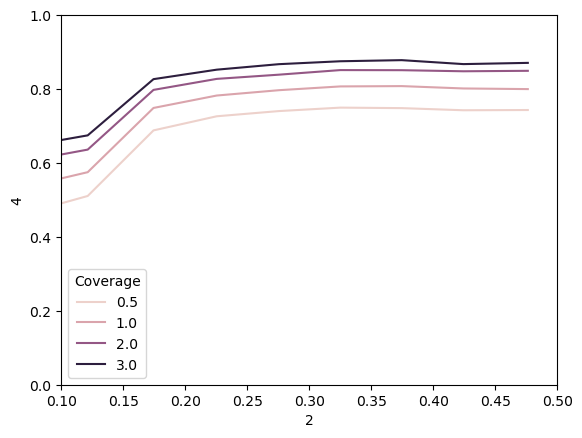

In [147]:
sns.lineplot(data = glimpse_concord, x = 2, y = 4, hue = "Coverage")
plt.xlim(0.1, 0.5)
plt.ylim(0,1)
plt.savefig("../glimpse_impute.pdf", dpi = 300)

We'll also reduce the reference panel to only high quality biallelic markers for the target individuals and remove sites with abnormally high depth (determined by using the per-site depth distributions of the highest overall coverage individual, A22165):

In [356]:
%%bash
source ~/.bashrc
conda activate ipyrad
vcftools --gzvcf ../calls/apal_imputation_panel.vcf.gz \
    --minGQ 20 --minQ 20 --recode-INFO-all \
    --max-missing 1.0 --minDP 5 --maxDP 75 \
    --min-alleles 2 --max-alleles 2 --remove-indels \
    --exclude-bed ../references/repeats.bed \
    --keep ../ref_panel_samples.txt \
    ../calls/apal_imputation_panel_hifi_illumina_biallelic.recode.vcf.gz

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details



VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf ../calls/apal_imputation_panel.vcf.gz
	--keep ../ref_panel_samples.txt
	--recode-INFO-all
	--max-alleles 2
	--maxDP 75
	--min-alleles 2
	--minDP 5
	--minGQ 20
	--minQ 20
	--max-missing 1
	--out ../calls/apal_imputation_panel_filtered_unrelated_biallelic
	--recode
	--remove-indels
	--exclude-bed ../references/repeats.bed

Using zlib version: 1.2.11
Keeping individuals in 'keep' list
After filtering, kept 78 out of 94 Individuals
Outputting VCF file...
	Read 267644 BED file entries.
After filtering, kept 3199556 out of a possible 8543659 Sites
Run Time = 1121.00 seconds


In [357]:
%%bash
source ~/.bashrc
conda activate ipyrad
bcftools +tag2tag ../calls/apal_imputation_panel_filtered_unrelated_biallelic.recode.vcf \
    -- --pl-to-gl > ../calls/apal_imputation_panel_filtered_unrelated_biallelic_GL.vcf

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details


In [ ]:
%%bash
source ~/.bashrc
conda activate ipyrad
bgzip ../calls/apal_imputation_panel_filtered_unrelated_biallelic_GL.vcf
tabix ../calls/apal_imputation_panel_filtered_unrelated_biallelic_GL.vcf.gz

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details


In [16]:
!cat ../references/apal_and_sym.bed | grep "^Apal" | awk -v s=1 '{print $1":"$2+s"-"$3+s}' \
    > ../references/apal_regions.txt

In [ ]:
task = "shapeit_phase"
mem = "128"
cpus = "30"
infile = "apal_imputation_panel_filtered_unrelated_biallelic_GL.vcf.gz"
outpath = "../shapeit_phase"
subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
     cpus + " ../" + task + ".sh " + 
     infile + " " + outpath], shell=True)

If I just naively concatenate these, the panel scaffolds won't be in the same order as the reference, so I'll sort the files based on the reference bed:

In [89]:
!ls ../shapeit_phase/target.phased.shapeit*.bcf | cut -d"/" -f3 | rev | cut -d"." -f2 | rev > ../files.txt

In [90]:
ordered = pd.read_csv("../references/apal_and_sym.bed", header = None, names = ["CHR", "START", "END"], sep = "\t")
files = pd.read_csv("../files.txt", header = None, names = ["CHR"])
ordered = ordered[ordered["CHR"].isin(files["CHR"])].reset_index(drop=True)

In [91]:
ordered["CHR"] = "../shapeit_phase/target.phased.shapeit." + ordered["CHR"] + ".bcf"

In [92]:
ordered[["CHR"]].set_index("CHR").to_csv("../files.txt", header = None)

In [94]:
%%bash
source ~/.bashrc
conda activate beagle
bcftools concat -f ../files.txt -o ../shapeit_phase/target.phased.bcf --threads 8
bcftools index -f ../shapeit_phase/target.phased.bcf

Checking the headers and starting positions of 367 files
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_1.bcf	0.112727 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_2.bcf	0.162978 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_3.bcf	0.004888 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_4.bcf	0.209553 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_5.bcf	0.139882 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_6.bcf	0.127766 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_7.bcf	0.001904 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_8.bcf	0.002023 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_9.bcf	0.001327 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_10.bcf	0.190001 seconds
Co

Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_92.bcf	0.000529 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_93.bcf	0.000469 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_94.bcf	0.000337 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_95.bcf	0.000367 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_96.bcf	0.000337 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_97.bcf	0.002482 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_98.bcf	0.000400 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_100.bcf	0.000792 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_101.bcf	0.000361 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_102.bcf	0.000362 seconds
Concatenating ../shapeit_phase/target.phased.sh

Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_184.bcf	0.001166 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_185.bcf	0.000406 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_186.bcf	0.000492 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_187.bcf	0.000416 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_189.bcf	0.001232 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_190.bcf	0.000396 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_191.bcf	0.000865 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_192.bcf	0.000443 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_193.bcf	0.000379 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_hic_scaffold_194.bcf	0.000386 seconds
Concatenating ../shapeit_phase/target.ph

Concatenating ../shapeit_phase/target.phased.shapeit.Apal_Sc0a5M3_208_HRSCAF_353.bcf	0.000459 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_Sc0a5M3_387_HRSCAF_700.bcf	0.000810 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_Sc0a5M3_247_HRSCAF_411.bcf	0.000316 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_Sc0a5M3_66_HRSCAF_114.bcf	0.000440 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_Sc0a5M3_133_HRSCAF_241.bcf	0.000419 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_Sc0a5M3_418_HRSCAF_789.bcf	0.000420 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_Sc0a5M3_415_HRSCAF_784.bcf	0.000358 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_Sc0a5M3_344_HRSCAF_598.bcf	0.000504 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_Sc0a5M3_73_HRSCAF_129.bcf	0.000518 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_Sc0a5M3_391_HRSCAF_715.bcf

Concatenating ../shapeit_phase/target.phased.shapeit.Apal_Sc0a5M3_419_HRSCAF_792.bcf	0.000598 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_Sc0a5M3_52_HRSCAF_88.bcf	0.000423 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_Sc0a5M3_377_HRSCAF_675.bcf	0.000446 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_Sc0a5M3_268_HRSCAF_440.bcf	0.000503 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_Sc0a5M3_60_HRSCAF_105.bcf	0.000385 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_Sc0a5M3_440_HRSCAF_826.bcf	0.000527 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_Sc0a5M3_402_HRSCAF_756.bcf	0.000392 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_Sc0a5M3_37_HRSCAF_65.bcf	0.000431 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_Sc0a5M3_207_HRSCAF_351.bcf	0.000329 seconds
Concatenating ../shapeit_phase/target.phased.shapeit.Apal_Sc0a5M3_339_HRSCAF_589.bcf	0.

In [162]:
%%bash
source ~/.bashrc
conda activate beagle
bcftools annotate ../shapeit_phase/target.phased.bcf --remove "INFO" \
    | bcftools view -e 'COUNT(GT="AA")=N_SAMPLES || COUNT(GT="RR")=N_SAMPLES' \
    | bcftools +fill-tags \
    -Ob -o ../shapeit_phase/target.phased_tagged.bcf -- -t all 
bcftools index ../shapeit_phase/target.phased_tagged.bcf

GLIMPSE2 imputation:

In [317]:
for frac in [0.025, 0.05, 0.1, 0.25, 0.5]:
    task = "glimpse_impute"
    mem = "256"
    cpus = "20"
    bam = "../subsampled_bams/" + str(frac) + ".txt"
    outpath = "../glimpse_impute"
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         bam + " " + outpath], shell=True)

Submitted batch job 5150961
Submitted batch job 5150962
Submitted batch job 5150963
Submitted batch job 5150964
Submitted batch job 5150965


In [318]:
!ls ../glimpse_impute/*_0.025.bcf | cut -d"/" -f3 | rev | cut -d"_" -f2- | rev > ../files.txt

In [319]:
for frac in [0.025, 0.05, 0.1, 0.25, 0.5]:
    ordered = pd.read_csv("../references/apal_and_sym.bed", header = None, names = ["CHR", "START", "END"], sep = "\t")
    files = pd.read_csv("../files.txt", header = None, names = ["CHR"])
    ordered = ordered[ordered["CHR"].isin(files["CHR"])].reset_index(drop=True)
    ordered["CHR"] = "../glimpse_impute/" + ordered["CHR"] + "_" + str(frac) + ".bcf"
    ordered[["CHR"]].set_index("CHR").to_csv("../" + str(frac) + "_files.txt", header = None)

In [320]:
%%bash
source ~/.bashrc
conda activate beagle
for FRAC in 0.025 0.05 0.1 0.25 0.5; do
    bcftools concat -f ../${FRAC}_files.txt -o ../glimpse_impute/imputed_final_${FRAC}.bcf --threads 8
    bcftools index -f ../glimpse_impute/imputed_final_${FRAC}.bcf
done

Checking the headers and starting positions of 367 files
Concatenating ../glimpse_impute/Apal_hic_scaffold_1_0.025.bcf	0.067514 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_2_0.025.bcf	0.109462 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_3_0.025.bcf	0.003096 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_4_0.025.bcf	0.119411 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_5_0.025.bcf	0.087723 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_6_0.025.bcf	0.085131 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_7_0.025.bcf	0.001927 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_8_0.025.bcf	0.001477 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_9_0.025.bcf	0.000910 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_10_0.025.bcf	0.111350 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_11_0.025.bcf	0.069479 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_12_0.025.bcf	0.004110 

Concatenating ../glimpse_impute/Apal_hic_scaffold_109_0.025.bcf	0.000559 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_110_0.025.bcf	0.000425 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_111_0.025.bcf	0.000341 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_112_0.025.bcf	0.000596 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_113_0.025.bcf	0.000596 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_114_0.025.bcf	0.000594 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_115_0.025.bcf	0.000962 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_116_0.025.bcf	0.000760 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_117_0.025.bcf	0.001696 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_118_0.025.bcf	0.000916 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_119_0.025.bcf	0.000404 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_120_0.025.bcf	0.000476 seconds
Concatenating ../glimpse_imp

Concatenating ../glimpse_impute/Apal_hic_scaffold_219_0.025.bcf	0.000452 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_220_0.025.bcf	0.000766 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_221_0.025.bcf	0.002968 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_222_0.025.bcf	0.000624 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_241_HRSCAF_403_0.025.bcf	0.000537 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_252_HRSCAF_417_0.025.bcf	0.003469 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_121_HRSCAF_217_0.025.bcf	0.001290 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_205_HRSCAF_348_0.025.bcf	0.000429 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_195_HRSCAF_336_0.025.bcf	0.000337 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_88_HRSCAF_160_0.025.bcf	0.000349 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_140_HRSCAF_249_0.025.bcf	0.000330 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_192_HRSCAF_333_0.025.bc

Concatenating ../glimpse_impute/Apal_Sc0a5M3_33_HRSCAF_60_0.025.bcf	0.000324 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_283_HRSCAF_466_0.025.bcf	0.000337 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_273_HRSCAF_452_0.025.bcf	0.000337 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_40_HRSCAF_68_0.025.bcf	0.000430 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_345_HRSCAF_599_0.025.bcf	0.000342 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_258_HRSCAF_427_0.025.bcf	0.001734 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_383_HRSCAF_694_0.025.bcf	0.000954 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_25_HRSCAF_41_0.025.bcf	0.000466 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_142_HRSCAF_253_0.025.bcf	0.000487 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_2_HRSCAF_2_0.025.bcf	0.001874 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_371_HRSCAF_659_0.025.bcf	0.000533 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_239_HRSC

Concatenating ../glimpse_impute/Apal_hic_scaffold_30_0.05.bcf	0.072130 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_31_0.05.bcf	0.075497 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_32_0.05.bcf	0.000923 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_33_0.05.bcf	0.002125 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_34_0.05.bcf	0.000632 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_35_0.05.bcf	0.080740 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_36_0.05.bcf	0.000857 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_37_0.05.bcf	0.000716 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_38_0.05.bcf	0.001636 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_39_0.05.bcf	0.000598 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_40_0.05.bcf	0.001596 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_41_0.05.bcf	0.000754 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_42

Concatenating ../glimpse_impute/Apal_hic_scaffold_142_0.05.bcf	0.000783 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_143_0.05.bcf	0.000413 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_144_0.05.bcf	0.000325 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_145_0.05.bcf	0.001690 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_146_0.05.bcf	0.000410 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_147_0.05.bcf	0.000367 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_148_0.05.bcf	0.000263 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_150_0.05.bcf	0.000490 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_151_0.05.bcf	0.000471 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_152_0.05.bcf	0.000518 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_153_0.05.bcf	0.000631 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_154_0.05.bcf	0.000489 seconds
Concatenating ../glimpse_impute/Apal_hic

Concatenating ../glimpse_impute/Apal_Sc0a5M3_132_HRSCAF_240_0.05.bcf	0.000302 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_36_HRSCAF_64_0.05.bcf	0.000462 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_31_HRSCAF_51_0.05.bcf	0.000405 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_363_HRSCAF_640_0.05.bcf	0.000337 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_65_HRSCAF_113_0.05.bcf	0.000398 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_366_HRSCAF_648_0.05.bcf	0.000359 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_219_HRSCAF_368_0.05.bcf	0.000448 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_176_HRSCAF_310_0.05.bcf	0.000303 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_103_HRSCAF_186_0.05.bcf	0.000355 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_15_HRSCAF_25_0.05.bcf	0.000313 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_275_HRSCAF_455_0.05.bcf	0.000338 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_434_HRSCAF_817_0

Concatenating ../glimpse_impute/Apal_Sc0a5M3_222_HRSCAF_371_0.05.bcf	0.000321 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_206_HRSCAF_350_0.05.bcf	0.000364 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_226_HRSCAF_375_0.05.bcf	0.000276 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_435_HRSCAF_818_0.05.bcf	0.000305 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_231_HRSCAF_389_0.05.bcf	0.000321 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_113_HRSCAF_207_0.05.bcf	0.000341 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_419_HRSCAF_792_0.05.bcf	0.000395 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_52_HRSCAF_88_0.05.bcf	0.000353 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_377_HRSCAF_675_0.05.bcf	0.000409 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_268_HRSCAF_440_0.05.bcf	0.000383 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_60_HRSCAF_105_0.05.bcf	0.000349 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_440_HRSCAF_8

Concatenating ../glimpse_impute/Apal_hic_scaffold_69_0.1.bcf	0.000346 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_70_0.1.bcf	0.000703 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_71_0.1.bcf	0.000669 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_72_0.1.bcf	0.000430 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_73_0.1.bcf	0.000396 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_74_0.1.bcf	0.000456 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_75_0.1.bcf	0.000419 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_76_0.1.bcf	0.000391 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_77_0.1.bcf	0.000331 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_78_0.1.bcf	0.000417 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_79_0.1.bcf	0.000407 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_80_0.1.bcf	0.000614 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_82_0.1.bcf	0.0

Concatenating ../glimpse_impute/Apal_hic_scaffold_181_0.1.bcf	0.000412 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_182_0.1.bcf	0.000357 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_183_0.1.bcf	0.000395 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_184_0.1.bcf	0.000371 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_185_0.1.bcf	0.000325 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_186_0.1.bcf	0.000352 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_187_0.1.bcf	0.000326 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_189_0.1.bcf	0.000407 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_190_0.1.bcf	0.000384 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_191_0.1.bcf	0.000596 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_192_0.1.bcf	0.000741 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_193_0.1.bcf	0.000571 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_19

Concatenating ../glimpse_impute/Apal_Sc0a5M3_181_HRSCAF_318_0.1.bcf	0.000264 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_144_HRSCAF_255_0.1.bcf	0.000427 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_225_HRSCAF_374_0.1.bcf	0.000612 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_108_HRSCAF_196_0.1.bcf	0.000337 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_188_HRSCAF_328_0.1.bcf	0.000279 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_388_HRSCAF_705_0.1.bcf	0.000558 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_126_HRSCAF_226_0.1.bcf	0.000294 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_57_HRSCAF_100_0.1.bcf	0.000328 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_102_HRSCAF_185_0.1.bcf	0.000377 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_143_HRSCAF_254_0.1.bcf	0.001424 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_139_HRSCAF_248_0.1.bcf	0.000391 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_99_HRSCAF_182_0.1.bcf

Concatenating ../glimpse_impute/Apal_Sc0a5M3_154_HRSCAF_270_0.1.bcf	0.000437 seconds
Checking the headers and starting positions of 367 files
Concatenating ../glimpse_impute/Apal_hic_scaffold_1_0.25.bcf	0.060062 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_2_0.25.bcf	0.089447 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_3_0.25.bcf	0.001752 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_4_0.25.bcf	0.090287 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_5_0.25.bcf	0.069899 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_6_0.25.bcf	0.072617 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_7_0.25.bcf	0.001069 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_8_0.25.bcf	0.001839 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_9_0.25.bcf	0.000651 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_10_0.25.bcf	0.097787 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_11_0.25.bcf	0.054751 second

Concatenating ../glimpse_impute/Apal_hic_scaffold_109_0.25.bcf	0.001445 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_110_0.25.bcf	0.000459 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_111_0.25.bcf	0.000434 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_112_0.25.bcf	0.000475 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_113_0.25.bcf	0.000399 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_114_0.25.bcf	0.000543 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_115_0.25.bcf	0.000817 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_116_0.25.bcf	0.000607 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_117_0.25.bcf	0.000653 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_118_0.25.bcf	0.000692 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_119_0.25.bcf	0.000309 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_120_0.25.bcf	0.000380 seconds
Concatenating ../glimpse_impute/Apal_hic

Concatenating ../glimpse_impute/Apal_hic_scaffold_220_0.25.bcf	0.000587 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_221_0.25.bcf	0.000741 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_222_0.25.bcf	0.000499 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_241_HRSCAF_403_0.25.bcf	0.000441 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_252_HRSCAF_417_0.25.bcf	0.003617 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_121_HRSCAF_217_0.25.bcf	0.000403 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_205_HRSCAF_348_0.25.bcf	0.000386 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_195_HRSCAF_336_0.25.bcf	0.000289 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_88_HRSCAF_160_0.25.bcf	0.000347 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_140_HRSCAF_249_0.25.bcf	0.000371 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_192_HRSCAF_333_0.25.bcf	0.000486 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_100_HRSCAF_183_0.25.bcf	0.00

Concatenating ../glimpse_impute/Apal_Sc0a5M3_273_HRSCAF_452_0.25.bcf	0.000427 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_40_HRSCAF_68_0.25.bcf	0.000401 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_345_HRSCAF_599_0.25.bcf	0.000358 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_258_HRSCAF_427_0.25.bcf	0.001452 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_383_HRSCAF_694_0.25.bcf	0.000764 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_25_HRSCAF_41_0.25.bcf	0.000357 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_142_HRSCAF_253_0.25.bcf	0.000387 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_2_HRSCAF_2_0.25.bcf	0.001585 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_371_HRSCAF_659_0.25.bcf	0.000531 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_239_HRSCAF_401_0.25.bcf	0.000318 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_120_HRSCAF_216_0.25.bcf	0.000393 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_212_HRSCAF_358_0.

Concatenating ../glimpse_impute/Apal_hic_scaffold_34_0.5.bcf	0.000801 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_35_0.5.bcf	0.059251 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_36_0.5.bcf	0.001123 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_37_0.5.bcf	0.000656 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_38_0.5.bcf	0.001100 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_39_0.5.bcf	0.000856 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_40_0.5.bcf	0.000843 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_41_0.5.bcf	0.001337 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_42_0.5.bcf	0.000490 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_43_0.5.bcf	0.000460 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_44_0.5.bcf	0.002331 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_45_0.5.bcf	0.000831 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_46_0.5.bcf	0.0

Concatenating ../glimpse_impute/Apal_hic_scaffold_147_0.5.bcf	0.000417 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_148_0.5.bcf	0.000308 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_150_0.5.bcf	0.000494 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_151_0.5.bcf	0.000516 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_152_0.5.bcf	0.000505 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_153_0.5.bcf	0.000667 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_154_0.5.bcf	0.000459 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_155_0.5.bcf	0.000466 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_156_0.5.bcf	0.000455 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_157_0.5.bcf	0.000391 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_158_0.5.bcf	0.000532 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_159_0.5.bcf	0.000719 seconds
Concatenating ../glimpse_impute/Apal_hic_scaffold_16

Concatenating ../glimpse_impute/Apal_Sc0a5M3_219_HRSCAF_368_0.5.bcf	0.000534 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_176_HRSCAF_310_0.5.bcf	0.000396 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_103_HRSCAF_186_0.5.bcf	0.000378 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_15_HRSCAF_25_0.5.bcf	0.000289 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_275_HRSCAF_455_0.5.bcf	0.000292 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_434_HRSCAF_817_0.5.bcf	0.000388 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_211_HRSCAF_357_0.5.bcf	0.000301 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_354_HRSCAF_614_0.5.bcf	0.000353 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_98_HRSCAF_178_0.5.bcf	0.000400 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_138_HRSCAF_246_0.5.bcf	0.000319 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_232_HRSCAF_390_0.5.bcf	0.000308 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_141_HRSCAF_251_0.5.bcf	

Concatenating ../glimpse_impute/Apal_Sc0a5M3_52_HRSCAF_88_0.5.bcf	0.000359 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_377_HRSCAF_675_0.5.bcf	0.000995 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_268_HRSCAF_440_0.5.bcf	0.000422 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_60_HRSCAF_105_0.5.bcf	0.000335 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_440_HRSCAF_826_0.5.bcf	0.000356 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_402_HRSCAF_756_0.5.bcf	0.000335 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_37_HRSCAF_65_0.5.bcf	0.000331 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_207_HRSCAF_351_0.5.bcf	0.000323 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_339_HRSCAF_589_0.5.bcf	0.000657 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_259_HRSCAF_428_0.5.bcf	0.000744 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_220_HRSCAF_369_0.5.bcf	0.000414 seconds
Concatenating ../glimpse_impute/Apal_Sc0a5M3_182_HRSCAF_319_0.5.bcf	0.

To get an idea of genotype imputation accuracy, we'll generate a VCF that contains the "ground truth" (high coverage samples called with BCFtools), subset to only the test individuals and the same positions that are in the reference panel:

In [200]:
%%bash
source ~/.bashrc
conda activate beagle
bcftools view ../shapeit_phase/target.phased_tagged.bcf | grep -v "^##" | cut -f1-2 > ../positions.txt

In [201]:
%%bash
source ~/.bashrc
conda activate ipyrad
vcftools --gzvcf ../calls/apal_imputation_panel.vcf.gz \
    --positions ../positions.txt \
    --keep ../testing_samples.txt \
    --recode --out ../calls/ground_truth

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details



VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf ../calls/apal_imputation_panel.vcf.gz
	--keep ../testing_samples.txt
	--out ../calls/ground_truth
	--positions ../positions.txt
	--recode

Using zlib version: 1.2.11
Keeping individuals in 'keep' list
After filtering, kept 5 out of 94 Individuals
Outputting VCF file...
After filtering, kept 3532681 out of a possible 8543659 Sites
Run Time = 226.00 seconds


In [203]:
%%bash
source ~/.bashrc
conda activate ipyrad
bgzip ../calls/ground_truth.recode.vcf
tabix ../calls/ground_truth.recode.vcf.gz

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details


In [327]:
!echo -e "A22242_0.1 A22242\nA22238_0.1 A22238\nA22237_0.1 A22237\nA22240_0.1 A22240\nA22241_0.1 A22241" \
    > ../reheader.txt

In [328]:
%%bash
source ~/.bashrc
conda activate beagle
bcftools reheader ../glimpse_impute/imputed_final_0.1.bcf \
    --samples ../reheader.txt > ../glimpse_impute/imputed_final_0.1_rehead.bcf

In [329]:
!echo -e "A22242_0.5 A22242\nA22238_0.5 A22238\nA22237_0.5 A22237\nA22240_0.5 A22240\nA22241_0.5 A22241" \
    > ../reheader.txt

In [330]:
%%bash
source ~/.bashrc
conda activate beagle
bcftools reheader ../glimpse_impute/imputed_final_0.5.bcf \
    --samples ../reheader.txt > ../glimpse_impute/imputed_final_0.5_rehead.bcf

In [331]:
!echo -e "A22242_0.05 A22242\nA22238_0.05 A22238\nA22237_0.05 A22237\nA22240_0.05 A22240\nA22241_0.05 A22241" \
    > ../reheader.txt

In [332]:
%%bash
source ~/.bashrc
conda activate beagle
bcftools reheader ../glimpse_impute/imputed_final_0.05.bcf \
    --samples ../reheader.txt > ../glimpse_impute/imputed_final_0.05_rehead.bcf

In [1]:
%%bash
rm ../concordance.lst
for i in 1 2 4 5 6 10 11 15 17 20 21 30 31 35; do
    echo -e "Apal_hic_scaffold_${i}\t\
    ../shapeit_phase/target.phased_tagged.bcf\t\
    ../calls/ground_truth.recode.vcf.gz\t\
    ../glimpse_impute/imputed_final_0.1_rehead.bcf" >> ../concordance.lst
done

In [335]:
!cat ../concordance.lst

Apal_hic_scaffold_1	    ../shapeit_phase/target.phased_tagged.bcf	    ../calls/ground_truth.recode.vcf.gz	    ../glimpse_impute/imputed_final_0.1_rehead.bcf
Apal_hic_scaffold_2	    ../shapeit_phase/target.phased_tagged.bcf	    ../calls/ground_truth.recode.vcf.gz	    ../glimpse_impute/imputed_final_0.1_rehead.bcf
Apal_hic_scaffold_4	    ../shapeit_phase/target.phased_tagged.bcf	    ../calls/ground_truth.recode.vcf.gz	    ../glimpse_impute/imputed_final_0.1_rehead.bcf
Apal_hic_scaffold_5	    ../shapeit_phase/target.phased_tagged.bcf	    ../calls/ground_truth.recode.vcf.gz	    ../glimpse_impute/imputed_final_0.1_rehead.bcf
Apal_hic_scaffold_6	    ../shapeit_phase/target.phased_tagged.bcf	    ../calls/ground_truth.recode.vcf.gz	    ../glimpse_impute/imputed_final_0.1_rehead.bcf
Apal_hic_scaffold_10	    ../shapeit_phase/target.phased_tagged.bcf	    ../calls/ground_truth.recode.vcf.gz	    ../glimpse_impute/imputed_final_0.1_rehead.bcf
Apal_hic_scaffold_11	    ../shapeit_phase/target.phased_t

In [2]:
%%bash
source ~/.bashrc
mkdir -p ../GLIMPSE_concordance
cd ../GLIMPSE_concordance
conda activate beagle
GLIMPSE2_concordance --input ../concordance.lst --min-val-dp 5 \
    --output output \
    --min-val-gl 0.9999 \
    --bins 0.00000 0.00100 0.00200 0.00500 0.01000 0.05000 0.10000 0.20000 0.50000 \
    --af-tag AF --thread 8


[GLIMPSE2] Check concordance of imputed data
  * Authors              : Simone RUBINACCI & Olivier DELANEAU, University of Lausanne
  * Contact              : simone.rubinacci@unil.ch & olivier.delaneau@unil.ch
  * Version       	 : GLIMPSE2_concordance v2.0.0 / commit = 2.0.0 / release = 2023-01-30
  * Citation	         : BiorXiv, (2022). DOI: https://doi.org/10.1101/2022.11.28.518213
  *         	         : Nature Genetics 53, 120–126 (2021). DOI: https://doi.org/10.1038/s41588-020-00756-0
  * Run date      	 : 02/10/2023 - 12:11:24

Files are listed in [../concordance.lst]

Parameters:
  * Output            : output
  * Seed              : 15052011
  * #Threads          : 8
  * Min validation GL : 0.9999
  * Min validation DP : 5
  * Using INFO/AF tag for allele frequency bins.
  * #bins             : 9
  * Output r2 per site: NO
  * Output rej. sites : NO
  * Output conc sites : NO
  * Output disc sites : NO

Initializing engine based on allele frequency bins:
  * Validation GL Pr

  * Frequencies [../shapeit_phase/target.phased_tagged.bcf]
  * Region      [Apal_hic_scaffold_11]

  * #variants in the overlap (biallelic SNPs and indels) = 43580
  * #variants with all genotypes in the validation data = 8688
  * #variants with at least one genotype in the validation data = 43240 [SNPs = 42808 (99.0009%), indels = 432 (0.999075%)]
  * #genotypes used in validation = 150575 [#SNPs = 148967 (98.9321%), indels = 1608 (1.06791%)]

  * Statistics on discarded true genoypes:
     #FORMAT/DP missing: 0
     #FORMAT/DP < min-val-dp: 693
     #Missing/malformatted PLs: 0
     #Max(GLs) < min-val-gl: 66632
     #Other (e.g. PLs have the same value): 0

  * Statistics on discarded dosages / genotype probabilities:
     #Missing/malformatted DSs: 0
     #Missing/malformatted GPs: 0
     #Filtered target GPs [gp_filter: 0]: 0
     #Other (e.g. no unique best-guess genotype): 0

  * Error rate in this file = 3.9575% [SNPs = 3.96866%, indels = 2.92289%)]

Reading set of input files

  * #genotypes used in validation = 169673 [#SNPs = 167891 (98.9497%), indels = 1782 (1.05026%)]

  * Statistics on discarded true genoypes:
     #FORMAT/DP missing: 0
     #FORMAT/DP < min-val-dp: 805
     #Missing/malformatted PLs: 0
     #Max(GLs) < min-val-gl: 75177
     #Other (e.g. PLs have the same value): 0

  * Statistics on discarded dosages / genotype probabilities:
     #Missing/malformatted DSs: 0
     #Missing/malformatted GPs: 0
     #Filtered target GPs [gp_filter: 0]: 0
     #Other (e.g. no unique best-guess genotype): 0

  * Error rate in this file = 3.43779% [SNPs = 3.44211%, indels = 3.0303%)]

  * Total #variants = 795748

Writting output files
  * Concordance per sample: [output.error.spl.txt.gz]
  * Concordance by frequency bin: [output.error.grp.txt.gz]
  * Concordance per calibration bin: [output.error.cal.txt.gz]
  * Rsquare per frequency bin: [output.rsquare.grp.txt.gz]
  * Rsquare per sample: [output.rsquare.spl.txt.gz]

--- Concordance finished - running ti

In [3]:
!python ../concordance_plot.py

In [355]:
!zcat ../GLIMPSE_concordance/output.rsquare.grp.txt.gz

0 0 0 0 0
1 0 0 0 0
2 0 0 0 0
3 2880796 0.00641026 0.372287 0.414601
4 3280015 0.0230132 0.539115 0.580643
5 1192060 0.070169 0.619004 0.654983
6 1159616 0.146215 0.614128 0.649744
7 2403060 0.372209 0.519988 0.556657


In [208]:
%%bash
source ~/.bashrc
conda activate ipyrad
bcftools merge ../glimpse_impute/imputed_final_0.1.bcf ../calls/ground_truth.recode.vcf.gz \
    -O v | head -80000 | grep "^#" | tail -1

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details


[W::bcf_hdr_merge] Trying to combine "GP" tag definitions of different lengths


#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	A22242_0.1	A22238_0.1	A22237_0.1	A22240_0.1	A22241_0.1	A22237	A22238	A22240	A22241	A22242


In [210]:
%%bash
source ~/.bashrc
conda activate ipyrad
vcftools --vcf ../calls/glimpse_imputed.vcf --relatedness2 --out ../calls/glimpse_imputed

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details



VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ../calls/glimpse_imputed.vcf
	--out ../calls/glimpse_imputed
	--relatedness2

After filtering, kept 25 out of 25 Individuals
Outputting Individual Relatedness
After filtering, kept 3519611 out of a possible 3519611 Sites
Run Time = 27.00 seconds


In [213]:
relate = pd.read_csv("../calls/glimpse_imputed.relatedness2", sep = "\t")

In [226]:
(relate
 [relate["INDV1"].str.contains("0.025") | relate["INDV2"].str.contains("0.025")]
 [relate["INDV1"].isin(["A22242", "A22238", "A22237", "A22240", "A22241"]) 
  | relate["INDV2"].isin(["A22242", "A22238", "A22237", "A22240", "A22241"])]
 .sort_values("RELATEDNESS_PHI")).tail(60)

/tmp/ipykernel_2374708/1170645082.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (relate


,INDV1,INDV2,N_AaAa,N_AAaa,N1_Aa,N2_Aa,RELATEDNESS_PHI
591,A22241,A22238_0.025,196500,57282,613661,435712,0.078081
423,A22238_0.025,A22241,196500,57282,435712,613661,0.078081
590,A22241,A22242_0.025,193591,54701,613661,425604,0.081008
398,A22242_0.025,A22241,193591,54701,425604,613661,0.081008
499,A22241_0.025,A22242,203728,58036,457906,596993,0.083094
619,A22242,A22241_0.025,203728,58036,596993,457906,0.083094
567,A22240,A22237_0.025,204564,57058,609648,437739,0.086356
447,A22237_0.025,A22240,204564,57058,437739,609648,0.086356
565,A22240,A22242_0.025,198282,54308,609648,425604,0.086613
397,A22242_0.025,A22240,198282,54308,425604,609648,0.086613
